# Importing the libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from math import radians, cos, sin, asin, sqrt

import tensorflow 
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

import xgboost

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

from keras.models import Sequential

# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from mpl_toolkits import mplot3d

from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasRegressor


from pandas_profiling import ProfileReport

Using TensorFlow backend.


In [3]:
import sklearn
sklearn.__version__


'0.22.1'

In [ ]:
data = pd.read_csv("./housing_train.csv")


In [6]:
import joblib

<module 'joblib' from 'C:\\Users\\naham\\anaconda3\\lib\\site-packages\\joblib\\__init__.py'>

In [ ]:
df = data.copy()

In [ ]:
sns.heatmap(df.isna())

# Data Profiling

In [ ]:
profile = ProfileReport(df, title = "houserent data analysis", explorative = True)

In [ ]:
profile.to_file("house_rent_data.html")

# Clustering the lat long variables

In [14]:
import sklearn
from sklearn.cluster import KMeans
import joblib

In [15]:
sklearn.__version__


'0.22.1'

Here the lat long is the clubbed to a new attribute called clusters. KMeans clustring is used to cluster the lat and long value into 3 different clusters and stored ina seperate column using elblow curve

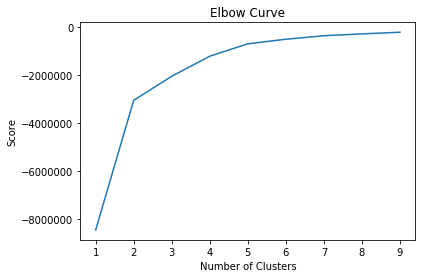

In [10]:
df = data.copy()
#removing the null values from lat and long columns
lat = df[~df["lat"].isna()]["lat"]
long = df[~df["long"].isna()]["long"]
lat_long = pd.DataFrame()
lat_long["lat"] = lat
lat_long["long"] = long



#elbow curve clustering  latirude, longitude variables 
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = lat_long[["lat"]]
X_axis = lat_long[["long"]]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
#from the below elbow curve we ca see that beyond 3 clusters thers isnp

kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(lat_long[lat_long.columns[0:2]]) # Compute k-means clustering.
lat_long['cluster_label'] = kmeans.fit_predict(lat_long[lat_long.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(lat_long[lat_long.columns[0:2]]) # Labels of each point
lat_long.head(10)
df = df[~df["lat"].isna()]

df.drop(["lat", "long"], inplace = True, axis = 1)

# Preprocess data

In [11]:
df = data.copy()

##################### CLustering Lat long variables by kmeans clustring #####################
# #removing the null values from lat and long columns
# lat = df[~df["lat"].isna()]["lat"]
# long = df[~df["long"].isna()]["long"]
# lat_long = pd.DataFrame()
# lat_long["lat"] = lat
# lat_long["long"] = long



# #elbow curve clustering  latirude, longitude variables 
# K_clusters = range(1,10)
# kmeans = [KMeans(n_clusters=i) for i in K_clusters]
# Y_axis = lat_long[["lat"]]
# X_axis = lat_long[["long"]]
# score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# # Visualize
# plt.plot(K_clusters, score)
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Curve')
# plt.show()
# #from the below elbow curve we ca see that beyond 3 clusters thers isnp

# kmeans = KMeans(n_clusters = 3, init ='k-means++')
# kmeans.fit(lat_long[lat_long.columns[0:2]]) # Compute k-means clustering.

kmeans = joblib.load("cluster_classifier")
lat_long['cluster_label'] = kmeans.fit_predict(lat_long[lat_long.columns[0:2]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(lat_long[lat_long.columns[0:2]]) # Labels of each point
lat_long.head(10)
df = df[~df["lat"].isna()]

df.drop(["lat", "long"], inplace = True, axis = 1)

def preprocess(df):
    #filling null values
    df["laundry_options"].fillna(df["laundry_options"].mode()[0], inplace = True)
    df["parking_options"].fillna(df["parking_options"].mode()[0], inplace = True)
    df["state"].fillna(df["state"].mode(), inplace = True)

    df["cluster"] = lat_long["cluster_label"]
    df.drop(["id", "url", "image_url","region", "description", "region_url","state"], inplace = True, axis = 1)
    
    #ordinal data
    df["laundry_encoded"] = [0]*df.shape[0]
    df["parking_encoded"] = [0]*df.shape[0]
    for i, el in enumerate(df["laundry_options"].unique()[::-1]):
        df[df["laundry_options"] == el]["laundry_options"]= i
    arr = ["no_parking", "off_street_parking", "street parking", "valetparking", "detached garage", "carport", "attached garage"]
    for i, el in enumerate(arr):
        df[df["parking_options"] == el]["parking_options"]= i
    df.drop(["laundry_options", "parking_options"], inplace = True, axis = 1)
    #dummy values for nominal data
    ord_col = ["type"]
    for i in ord_col:
        temp = pd.get_dummies(df[i], drop_first = True, prefix = i)
        df = pd.concat([df, temp], axis = 1)
        df.drop([i], axis = 1, inplace = True)
    return df

df = preprocess(df.copy())
 

C:\Users\naham\anaconda3\lib\site-packages\ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\naham\anaconda3\lib\site-packages\ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [13]:
df

,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,...,type_condo,type_cottage/cabin,type_duplex,type_flat,type_house,type_in-law,type_land,type_loft,type_manufactured,type_townhouse
0,1195,1908,3,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1120,1319,3,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,825,1133,1,1.5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,800,927,1,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,785,1047,2,1.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265184,929,728,1,1.0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
265185,0,1061,2,2.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265186,1069,1020,2,1.5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265187,1507,1660,2,1.5,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


NameError: name 'df' is not defined

In [14]:
#saving the kmeans clustering model
joblib.dump(kmeans, "cluster_classifier")


['cluster_classifier']

# Trai test spilt


In [15]:
cols = list(df.columns)
cols.remove("price")
X = df[cols]
y = df["price"]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 7)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#the target data is scaled sown using log for less variance and lo latency
y_train = np.log(y_train +1 )

In [18]:
len(list(X_train.columns))

23

# model 1 xgboost regressor(randomized search cv)

Parametrs for the tuning the xgboregressor

In [262]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ["gbtree", "gblinear"]
gamma = [0, 0.1, 0.2, 0.3, 0.4]
colsample_bytree = [0.3, 0.4, 0.5, 0.7]
min_child_weights = [1,2,3,4]
# base_score is the initail gloabl score given for all instances 
#the value doest matter if the learning rate and max_depth are optimized well
base_score = [0.25,0.5,0.75,1]
params = {
    "max_depth" : max_depth,
    "n_estimators" : n_estimators, 
    "gamma": gamma,
    "colsample_bytree": colsample_bytree,
    "min_child_weights": min_child_weights, 
    "base_score": base_score,
    "booster" : booster
}

In [263]:
regressor = xgboost.XGBRegressor()

Tuing the paramaters using Random Sserach cv

In [264]:
random_cv = RandomizedSearchCV(estimator = regressor, 
                              param_distributions = params,
                              cv = 5, n_iter = 5, 
                               scoring = "neg_mean_absolute_error", 
                               n_jobs =-1, 
                               verbose = 5, 
                               return_train_score = True, 
                               random_state = 42
                              )

Fitting the values

In [265]:
random_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done  20 out of  25 | elapsed:  1.3min remaining:   20.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.9min finished


[17:48:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                     

Estimatin  the best hyper paramters for the model

In [266]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, min_child_weights=3,
             missing=None, n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

In [268]:
regressor = xgboost.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, min_child_weights=3,
             missing=None, n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)
regressor.fit(X_train, y_train)

[17:51:52] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.3,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=15, min_child_weight=1, min_child_weights=3,
             missing=None, n_estimators=100, n_jobs=1, nthread=None,
             objective='reg:linear', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, seed=None, silent=None, subsample=1,
             verbosity=1)

Predicting the values and estimating exponential values

In [364]:
y_pred = regressor.predict(X_test)
y_pred = (np.exp(y_pred) - 1)

In [365]:
r_square = metrics.r2_score(y_test,y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

In [366]:
r_squareb

0.00018255962633217937

# Saving the model

In [318]:
import joblib
joblib.dump(regressor, "xgbregressor_house")

['xgbregressor_house']